# Predicting if it is possible to have a Tennis match based on climate conditions using Decision Tree algorithm.

### Done by Abdul Farhan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('/home/farhan/Downloads/archive/play_tennis.csv')

In [4]:
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


Now, we will have to convert the strings in data into integers using Label Encoder.

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
outlook=LabelEncoder()
temp=LabelEncoder()
humidity=LabelEncoder()
windy=LabelEncoder()
play=LabelEncoder()

In [7]:
df['outlook']=outlook.fit_transform(df['outlook'])
df['temp']=temp.fit_transform(df['temp'])
df['humidity']=humidity.fit_transform(df['humidity'])
df['wind']=windy.fit_transform(df['wind'])
df['play']=play.fit_transform(df['play'])

In [8]:
df

,day,outlook,temp,humidity,wind,play
0,D1,2,1,0,1,0
1,D2,2,1,0,0,0
2,D3,0,1,0,1,1
3,D4,1,2,0,1,1
4,D5,1,0,1,1,1
5,D6,1,0,1,0,0
6,D7,0,0,1,0,1
7,D8,2,2,0,1,0
8,D9,2,0,1,1,1
9,D10,1,2,1,1,1


In [9]:
feature_cols=['outlook','temp','humidity','wind']
X=df[feature_cols]
y=df.play

In [10]:
X

,outlook,temp,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [11]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64

# Split the data into testing and training part

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
classifier=DecisionTreeClassifier(criterion='gini')

# Train the training part of dataset

In [17]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

# Testing the divided part of dataset

In [18]:
classifier.predict(X_test)

array([0, 0, 1])

In [21]:
X_test                # 0=no  1=yes               outlook[sunny=2, mild=2, overcast=0, rainy=1]

,outlook,temp,humidity,wind
0,2,1,0,1
3,1,2,0,1
4,1,0,1,1


# Checking the accuracy of trained model

In [22]:
classifier.score(X_test,y_test)

0.6666666666666666

[Text(0.3333333333333333, 0.9, 'X[0] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.16666666666666666, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'X[2] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.5, 'X[0] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.3, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

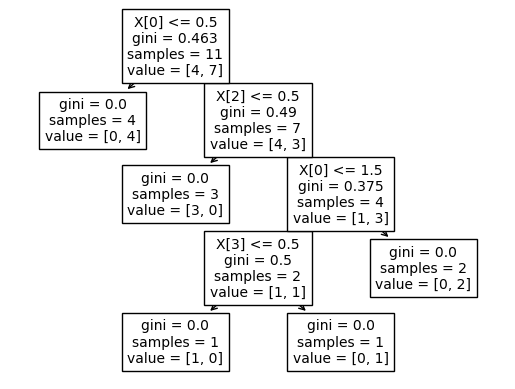

In [23]:
from sklearn import tree
tree.plot_tree(classifier)